## P13 图像基本操作

回顾
- 访问修改像素
- 访问属性
- 设置ROI: Region of Interest 
- 图像分割与合并

(估计就是一些np操作))

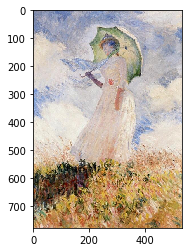

[182 163 160]
182 163 160


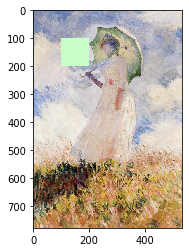

131
100
(778, 533, 3)
1244022
uint8


In [72]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread('./img/LaPromenade.jpg',1)
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

#访问像素
print(img[100,100])
b,g,r = img[100,100]
print(b,g,r)
imageRGB[100:200,100:200] = [200,255,200]
plt.imshow(imageRGB)
plt.show()

print(img.item(10,10,2))
img.itemset((10,10,2),100)
print(img.item(10,10,2))

## numpy批量访问速度快 单个访问速度慢

print(img.shape)
print(img.size)
print(img.dtype)

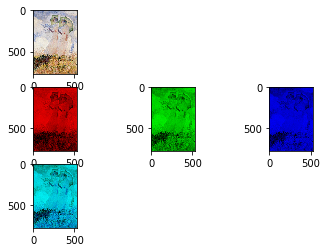

In [73]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

grid = 330

# 剪切复制
img = cv.imread('./img/LaPromenade.jpg',1)
mademoiselle = img[50:600,200:400]
img[70:620,300:500] = mademoiselle
imageRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.subplot(grid+1)
plt.imshow(imageRGB)

# r,g,b = cv.split(img) #很花时间
b=img[:,:,2]
g=img[:,:,1]
r=img[:,:,0]
imageR = np.zeros(img.shape,np.uint8)
imageR[:,:,0] = r
imageG = np.zeros(img.shape,np.uint8)
imageG[:,:,1] = g
imageB = np.zeros(img.shape,np.uint8)
imageB[:,:,2] = b

plt.subplot(grid+4)
plt.imshow(imageR)
plt.subplot(grid+5)
plt.imshow(imageG)
plt.subplot(grid+6)
plt.imshow(imageB)

# 合并通道
imageGB = cv.merge((np.zeros(r.shape,np.uint8),g,b))
plt.subplot(grid+7)
plt.imshow(imageGB)

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x149e84dc190>,
 Text(0.5, 1.0, 'ORIGINAL'))

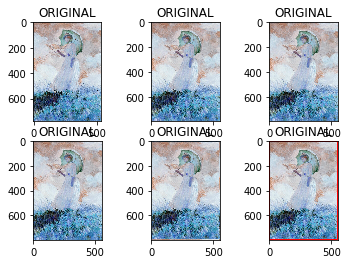

In [76]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

BLUE = [255,0,0]

# 加边框 卷积补零用
img = cv.imread('./img/LaPromenade.jpg',1)
replicate = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT)
reflect_101 = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_WRAP)
constant = cv.copyMakeBorder(img,10,10,10,10,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('ORIGINAL')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('ORIGINAL')
plt.subplot(234),plt.imshow(reflect_101,'gray'),plt.title('ORIGINAL')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('ORIGINAL')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('ORIGINAL')



## P14 图像算数运算

//todo

cv函数 加减位运算   
cv.add()  //形状要相同
cv.addWeighted()  

**numpy数组相加溢出循环 cv相加取最大值**

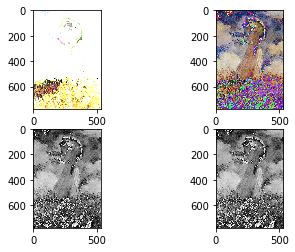

In [86]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread('./img/LaPromenade.jpg',0)#灰图
img2 = cv.imread('./img/LaPromenade.jpg',1)

# img3 = cv.add(img1,img2) #形状不同会报错
img4 = cv.add(img2,img2)
img5 = img2+img2

imageRGB = cv.cvtColor(img4,cv.COLOR_BGR2RGB)
plt.subplot(2,2,1),plt.imshow(imageRGB)
imageRGB = cv.cvtColor(img5,cv.COLOR_BGR2RGB)
plt.subplot(2,2,2),plt.imshow(imageRGB)

img6 = cv.add(img1,img1)
img7 = img1+img1
imageRGB = cv.cvtColor(img7,cv.COLOR_BGR2RGB)# 可以把单色数据变为三色灰度图
plt.subplot(2,2,3),plt.imshow(imageRGB)
imageRGB = cv.cvtColor(img7,cv.COLOR_BGR2RGB)
plt.subplot(2,2,4),plt.imshow(imageRGB)
plt.show()

## P15 图像融合渐变效果

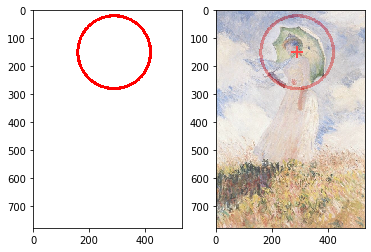

In [94]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = cv.imread('./img/LaPromenade.jpg',1)
img1 = np.full(img.shape,255,np.uint8)

cv.circle(img1,(290,150),130,(0,0,255),10)
cv.line(img,(310,150),(270,150),(0,0,255),5)
cv.line(img,(290,130),(290,170),(0,0,255),5)

dst = cv.addWeighted(img,0.7,img1,0.3,0)
imageRGB = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
plt.subplot(1,2,1),plt.imshow(imageRGB)
imageRGB = cv.cvtColor(dst,cv.COLOR_BGR2RGB)
plt.subplot(1,2,2),plt.imshow(imageRGB)
plt.show()


## P16 按位运算抠图效果

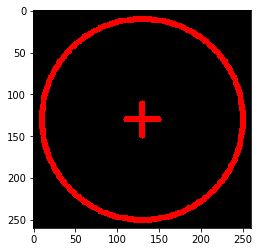

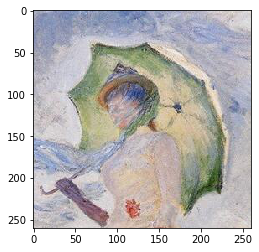

In [101]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv.imread('./img/LaPromenade.jpg',1)
img2 = np.zeros((260,260,3),np.uint8)

cv.circle(img2,(130,130),120,(0,0,255),5)
cv.line(img2,(110,130),(150,130),(0,0,255),5)
cv.line(img2,(130,110),(130,150),(0,0,255),5)
imageRGB = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

roi = img1[(150-130):(150+130),(290-130):(290+130)]
imageRGB = cv.cvtColor(roi,cv.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

# img2gray = cv.cvtColor


## P26 cv函数与np函数效率对比